In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/echonet-ef/FileList.csv")

In [3]:
df.head()

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,0X100009310A3BD7FC,78.498406,14.881368,69.210534,112,112,50,174,VAL
1,0X1002E8FBACD08477,59.101988,40.383876,98.742884,112,112,50,215,TRAIN
2,0X1005D03EED19C65B,62.363798,14.267784,37.909734,112,112,50,104,TRAIN
3,0X10075961BC11C88E,54.545097,33.143084,72.914210,112,112,55,122,TRAIN
4,0X10094BA0A028EAC3,24.887742,127.581945,169.855024,112,112,52,207,VAL


In [4]:
X_ef = df[['EF']].values
scaler_ef = StandardScaler()
X_ef_scaled = scaler_ef.fit_transform(X_ef)

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['clusterID'] = kmeans.fit_predict(X_ef_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
score = silhouette_score(X_ef_scaled, df['clusterID'])
print("Silhouette Score:", score)

Silhouette Score: 0.543667994288654


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

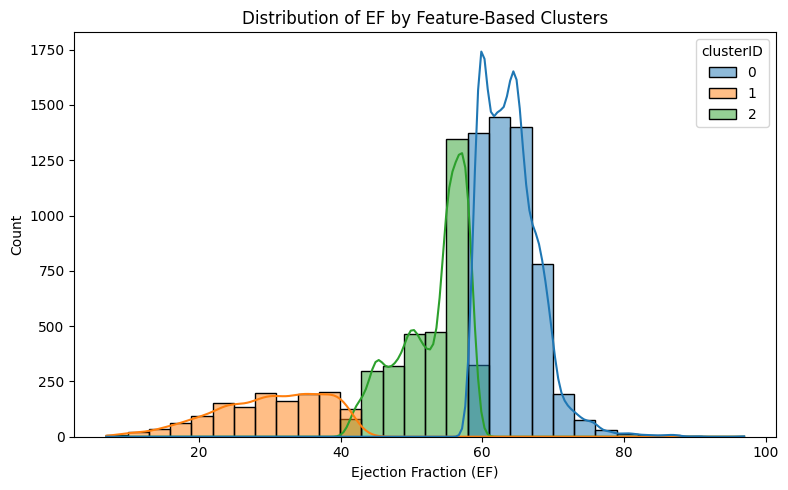

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='EF', hue='clusterID', bins=30, kde=True, palette='tab10')
plt.title("Distribution of EF by Feature-Based Clusters")
plt.xlabel("Ejection Fraction (EF)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [12]:
df.head()

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split,clusterID
0,0X100009310A3BD7FC,78.498406,14.881368,69.210534,112,112,50,174,VAL,0
1,0X1002E8FBACD08477,59.101988,40.383876,98.742884,112,112,50,215,TRAIN,0
2,0X1005D03EED19C65B,62.363798,14.267784,37.909734,112,112,50,104,TRAIN,0
3,0X10075961BC11C88E,54.545097,33.143084,72.914210,112,112,55,122,TRAIN,2
4,0X10094BA0A028EAC3,24.887742,127.581945,169.855024,112,112,52,207,VAL,1


In [13]:
df.to_csv("FinalClusters.csv", index=False)